# HAR-CASCADE TEST from IMG_URL


In [1]:
"""
# Face Recognition by OpenCV-Python (py-2.7)
# urllib.request.urlopen('http://216.58.192.142',timeout=1)
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml = https://bit.ly/3jFEy0v
#
"""
print(__doc__)

import os
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

from _path import (get_cut_dir, stop_if_none)


# Face Recognition by OpenCV-Python (py-2.7)
# urllib.request.urlopen('http://216.58.192.142',timeout=1)
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml = https://bit.ly/3jFEy0v
#


# functions : for a few initial path setting



In [2]:
dir_dnn = get_cut_dir('drowsiness_detect') + 'src_dnn/'
dir_img = get_cut_dir('drowsiness_detect') + 'src_image/'

describe_str = "Here, 'Haar Cascade' Founds '{0}' faces!"

model = 'haarcascade_frontalface.xml'
model_dir = dir_dnn + model

In [3]:
def check_model_exist(model, dir_dnn, echo=1):
    if model in os.listdir(dir_dnn):
        download = False
    else:
        # download harr-cascade.xml from githib.com - haarcascades
        download = True

        xmldata = urllib.request.urlopen('https://bit.ly/3jFEy0v').read()
        with open(model_dir,'wb') as f:
            f.write(xmldata)

    if download:
        if echo:
            print("Haar Cascade.xml download = O.K!")
            print(f"designated dir : {dir_dnn}")
        return True
    else:
        if echo:
            print(f"{model} is already exist on dir_dnn")
        return False

In [4]:
def find_faces(mode, input_value, width_inch, height_inch):
    """
    mode=0, full_url_to_image
    mode=1, filename_wdir
    """
    face_cascade = cv2.CascadeClassifier(model_dir)

    if mode:
        filename_wdir = dir_img + input_value
        image = cv2.imread(filename_wdir)
        
    else:
        full_url_to_image = input_value
        f = urllib.request.urlopen(full_url_to_image)
        image = np.asarray(bytearray(f.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    
    
    image = stop_if_none(image, message='image loading error!')

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(
                        gray,
                        scaleFactor=1.1,
                        minNeighbors=5,
                        minSize=(30, 30),
                        flags=cv2.CASCADE_SCALE_IMAGE
                    )

    print(describe_str.format(len(faces)))

    for i, (x, y, w, h) in enumerate(faces):
        cv2.rectangle(
                        img=image,
                        pt1=(x, y),
                        pt2=(x + w, y + h),
                        color=(9, 245, 50),   # BGR <-- rgb(50, 245, 9)
                        thickness=3,
                    )

        cv2.putText(
                        img=image,
                        text=f"{i+1}",
                        org=(x , y-10),
                        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1,
                        color=(9, 102, 249), # BGR = rgb(249, 102, 9)
                        thickness=3,
                        )

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=(width_inch, height_inch))
    
    ax.imshow(image, extent=[400, 500, 0, 1], aspect='auto')
    plt.title(describe_str.format(len(faces)), size=20, fontweight=10)
    plt.grid(False)
    plt.axis('off')
    plt.show()

In [5]:
IMG_URL1 = "https://bit.ly/3hYctB3"    # telegraph - ski resort
IMG_URL2 = 'https://bit.ly/3gUZIWJ'    # many faces inc'l a beard man
IMG_URL3 = 'https://bit.ly/3509nsL'    # a baby with beard

haarcascade_frontalface.xml is already exist on dir_dnn
Here, 'Haar Cascade' Founds '4' faces!


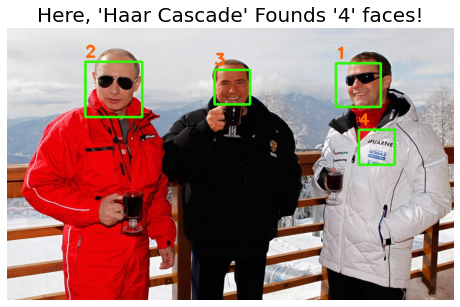

In [6]:
check_model_exist(model, dir_dnn)
find_faces(0, IMG_URL1, 8,5)

Here, 'Haar Cascade' Founds '21' faces!


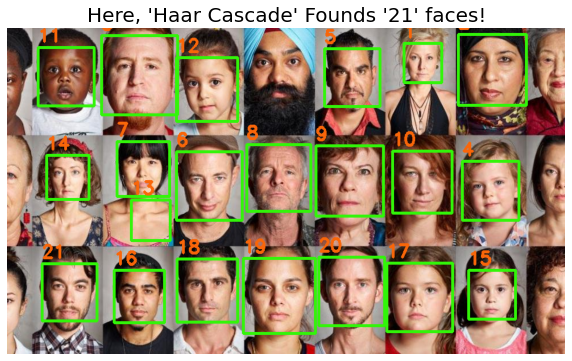

In [7]:
find_faces(0, IMG_URL2, 10,6)

Here, 'Haar Cascade' Founds '0' faces!


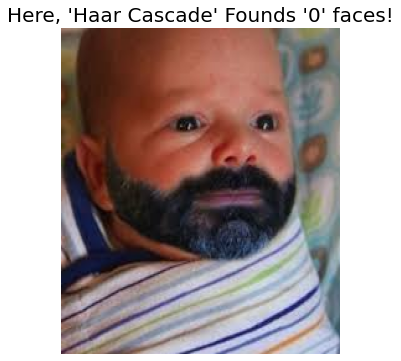

In [8]:
find_faces(0, IMG_URL3,5,6)

Here, 'Haar Cascade' Founds '9' faces!


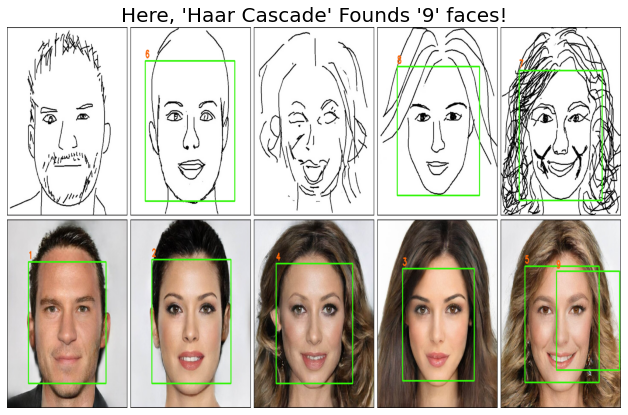

In [9]:
IMG_URL4 = 'https://scx2.b-cdn.net/gfx/news/hires/2020/5eeb9335dea92.jpg'
find_faces(0, IMG_URL4,11,7)

Here, 'Haar Cascade' Founds '47' faces!


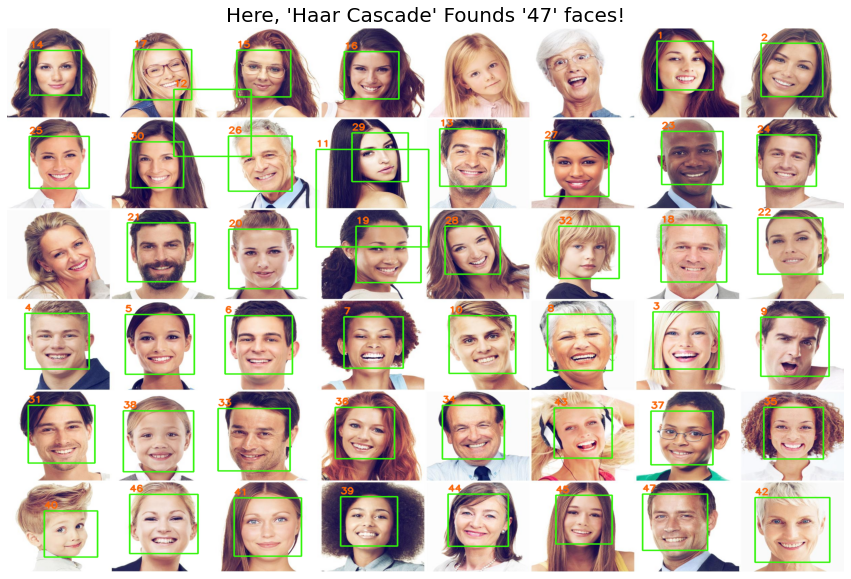

In [10]:
IMG_URL5 = 'https://static.independent.co.uk/s3fs-public/thumbnails/image/2017/10/09/11/faces-1.jpg'
find_faces(0, IMG_URL5,15,10)

Here, 'Haar Cascade' Founds '31' faces!


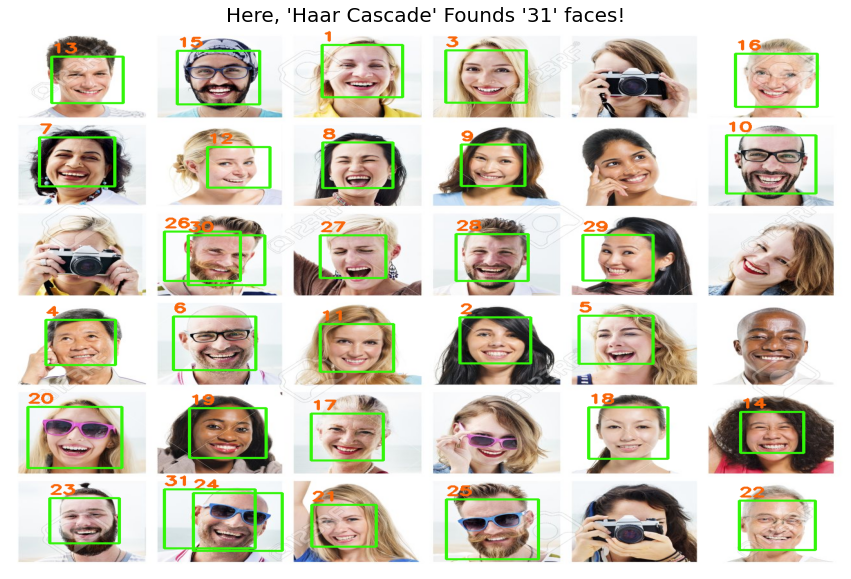

In [11]:
IMG_URL6 = 'https://previews.123rf.com/images/rawpixel/rawpixel1602/rawpixel160200801/51569594-collage-diverse-faces-expressions-people-concept.jpg'
find_faces(0, IMG_URL6,15,10)

Here, 'Haar Cascade' Founds '1' faces!


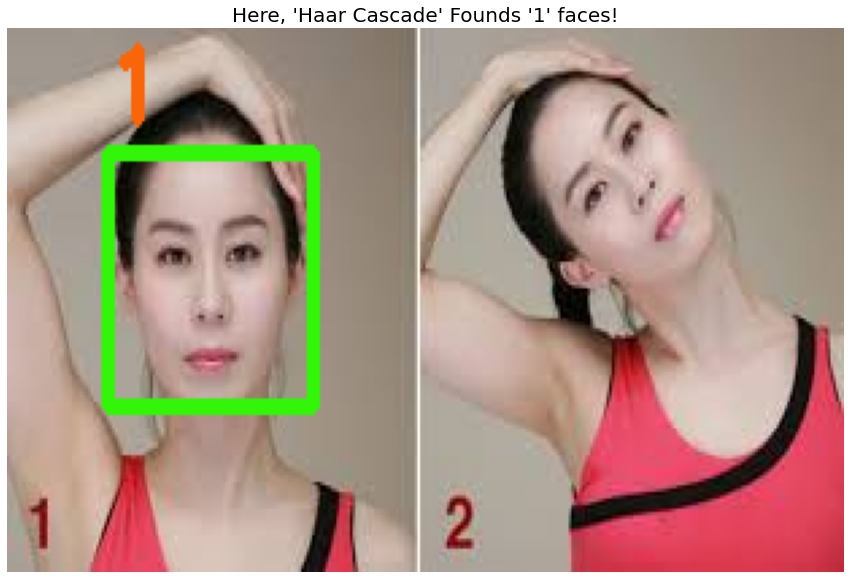

In [12]:
IMG_URL7 = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxASEBUQEBAVFRUQFRUQFRUVDw8VFRAQFRUWFxUVFRUYHSggGBolGxUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGhAQGi0lHyUtLS0tLS0tLS0tLS0tKy0tLS0tLS0tLS0tKy0tLTAtLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAKMBNgMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAADAAIEBQYBBwj/xAA/EAABAwIDBQUFBgUDBQEAAAABAAIDBBESITEFBkFRcRMiYYGxMlJykaEjM3OywdEHFEJi4ZKi8CQ0U4LxFf/EABoBAAMBAQEBAAAAAAAAAAAAAAABAgMEBgX/xAAwEQACAgEDAgQEBAcAAAAAAAAAAQIRAxIhMQRBBRMycVGBkbFhwdHwIjM0QqHh8f/aAAwDAQACEQMRAD8AtLJWTklkaDbJJy61hOgJ6BADLJpCnR7OkdyH1UuLYw/qcSlY6KXCjR0T3cLdTZX8ezWDQIwhaErZVIp6fY4Ptuv4AfqpMuxY7d2465qXNWMbqQmQ1zHnum9kDKCr2e5pyHl+yhELZTQhwVFW0evMfVAqKchNIRXN5phCYgZCaQiEJhCBAymEIpCYQkM5CO+34h6ha3av/cS/iyfmKykI77fiHqtZtX7+X8ST8xVRJZFSXUv1TENKe2Jx0afkrahpGtFyLk6k+gRZZmDUhTZekphTO5fQpwpHcj8kev25TwtxSODW8ybBZ2t/iJRN9gvf8EZIPhe6Nxqi5dTjgfI6oMkRGoVNBv7G82dRzWOh7Np+l1LG81JhtJI9l+Ekbxb5qbL0JkkhcKj0u1aOQ4YagPdybY/O5yUlVZnODiDITSEQhNIQSCITSEQhNISGDITCEQhNIQMGQmkIhCaUADsurqSQFtHEXaBTIdmk+0bdFbxUgCOGAKtwpFbFs1o4X6qZHSgcEYvAQJKkBKhhsICY+YBVtVtNrRckKgqdvF4cY/ZaCXPcbMaBrd37ICjSVW0mtGZWR2/vrDCCC/PkNSvOd4N75pnFsT7MvYOtYuHPPRUMMLnniSeJzJVKJDmuxpNpb9TyH7Nthzdmfkj7vb8ywm0zMbTnduThfw4qrpdkv1wE28Cpk27MhzDTa102ognM9a3a3qp6sWjf3hq05OA8QrmrhDhcajRfPwpZ6V4lY4sezQ+HK3Jeo7lb4iqb2clmzNGYubOHMJMuO7LWopsVzxGvh4/4VbKwg2Kt6l9psJP3jTbqFUyA3z6fJQipIEUwhEITSEyAZTCiEJpCAOQ+234h6rV7VH28v4j/AMxWVhHeb8Q9QtXtT/uJQBcmV9hz7xVLgl8kQqxoKM+05EoaC3edmfo3opNTMGNUt2UlRC2vtBsTDnawv0C852/vhNTgPa2/bXMZdbvNFruw8G5i3Naadn8zLd33TDpwkeDp4tHrlzXlu/daJq99tIgIR1bfF9Sfkmo3yEpVwBdNU1soM0hcSedmt+FugXpm7e6ULGBz2hzvHQKg/h7sYO+1cNMh+69SpYQAE2+xUI7WyLHstgFgwfIIFTsiMjvMaerQtBG0Ks3jqOzhOAd53cb1OV0qKsxG0926KR9ondlM3MGIm7T4gZKLDW1NLIGVpvEcm1DR3b8BJ7vVaV7oqKnuRd7yL+9LK7QBF2HO6ojcZISzMtwusbjx4cFI622AtcCLg3B4jNcIT4t3IoHOfC3AH+0wE4CeYbwPRdeyydmUoNASEwhFITSExAiEwhGITCEhgiE0ohCYQkAyySdZJAG6fNZRZawBV01ZzKpq3aHIoci1Et6vawHFUdTteR5wxgknkmRUb5M3d0fU/srGGBrBZot6nqUJNg5JFdHswvOKodi/sB7vnzWP/iPtggto47BoAdIANfdb4Dj8l6G/ReG7RqDLUPe4k3cczxAyC0SMZNs7QUJe4ADXwXp27O5rGgPfmTnn6WVPuRsoOIcRfivU6RgAAUtmsIJKyNHsllrBo+QRWbOaBoreICyc4BGkrUZDbWwo5WkFov0Xme0tky0k7ZogbxuxDWx5jzC9sqmrM7coQ4HLglwDV7hqmtbLBFOzMZSA+Fs/1CZW4SbjiMfy1VFudtFrXP2fIQD3nRX4tJu5vle/n4Kxqad8dgb927Rfi0jIqXaNKUkdITCngZDoFwqjnBlMKIQmkIA5D7bfiHqt8+kAmldqXSPN+QxHJYKId5vxD1XpFY6z3/E71KEHcjyuACzu0qh0juzafiPuj91K2xXEd1ubnHCB4qJTw4RbUnMn3jzRyN7IFUOEULiLARsc4X0GEXz+S8FdI58he43LnFxPMk3K99rY8UT25d5jhnpcg6rwOPJ2et1aMmex7gANpxz49VtYXry/cevAbhvyXoENUALk2sLnwU9zoXBcdrYKPPG2TxtmOqzclTLVv7hwwsOvvka+SlR7TiD+zZISQcNw15aHWvhLgLA24FDGkVe9O78lRJHckNZe9jmDln8rjzK1ey6XA0N5WQ4qm+T/AJp1dVthjMj3WaNTYki5sMhrckIDksauIFqzlZFYq+hkJbcqDVsuk2FWqKQhNIR5o7FCITMWqBkJhCKQmkJACITCEUhMISGCsup1kkAc2tibbm4ho6k2CkU1C1mZzdzP6DgpO1qXG0j/AJdMpnlzQTrofiGqUKs0yN0PSXbJWWhiDlGR6ELwZkf2hHJxH1Xvjh9cl4lRUv8A1ZidkRIWEHW4cQmiWepbnUuGFpOrs/JbKErOuZJga2GwOlzo0IbaWubmJg7wsVCOqjZNeul6zuytoVF8MzW9RzVlXTFrCRrwTFQed4VXWEHRU76ColJL5nAeGQsmN2GGd5k8gd1Fj1HFIZkt/aIxvbUR3a4Ovcf0vGhCt9i7flq6QGQAyRuw3GVwPD6o+9dPjpX4tQ3F5hZT+Hcr8cjBpk434XFv0RyiYtRlXZm+smEJ64UGYIppRCmEJAKEd5vxD1W325VBr3+DnepWJi9pvxD1VtvXUF9Q+Jupkc3/AHEIbpDitwNCTI4zO8Ws6cT+nkpybFGGtDRoBYeSeqSoiTtiXhu9WzTTVkkfAuMjDzjeSR8sx5L3NZffndn+bjD4gO2jHdubB7eLSfqFSZLPNtjbUMbsvD1XqlLP29Ndh9tpHQ6LxZzHMeWuaWuabEEEEEcDyW03K3hEf2Uh7rjl4HJEkXjlvTNztmV8dEY4b4mtDBYZ5kXIXdzN3uwaSXOOMhwDie7a+drnM3KsKZ7HAHIg58wVcU725BSmb0MraezLjhmq+jMj5XYyDGC3Ba97Ye8XeN7q9e4WUCoeGgkIAHtbarYhYZuOgHM6eZQNkyyOaTL7WI5WtYZZeJ1zVDsubtZTM692k4AWm2uvVaymZlcnM5lDWxvkjCEUlyV+1IzhuNbqBC+4z4K02rILADW6qyLOB964PXVSjkmh5CaQiFMKZmDITCEUhMISGDsknEJIGXj2KvlZgffg7Lz4FWxCiVsV2lKjXnYj2STIXXaDx0PUJ60swew12i8urKVw2ti1EkoeCAdHf8I8l6k9twRzyVRX0jA6MhoLmEEnjgBSbo0xwUl+JbOjIjxNFyBpzWMrptqOaZGOLXYiAwMDm4LXBufHLwXotEAWgFSDQtKSNXwZLduapcMNRm4NacVrd46ttzC0tfHeNtuKe6nazQItSPs2+CCbPPN4YK6S/YyPZZzm4Wlo7uWEl1788suCNsTZlWyUAyExkC4c4uOK2ZB4Ldw07Hi5ARzA1oT7B3Mtt2kvA9vNrh9CsBuTQvjlMmE2faLzILj5ZD5r0vbbhhIWc2FTYGeBOIX8VF9h6Vy+xZEJpTyE0hUYgymFEITCkAovab8Q9VaTsxVtQ7gyaVv/ALYj+h+qrIvab1HqtFX7MaKmVwFi6WRxI4kuJSZUVdgl1G/lHc/ohPY5uo+SqyHBnErJNcDoupkmT3y3RbVfax2ZMNSRlKP7rcctV5hs/ZdRK8thZiLM3Wc0YQDhJu4jjkve3BeP7erhR7UmMTe67223sHYwHOseBvYg8wq3GqtWa/dqGqgYGTZ3vZhcC5oGtiMitNFVLF0++tJLga6V7HAixMLiQTwOG481rXsPZktBJDTYnM3HO+ZWdM67glsy0jqDzScb6qgoquUWbIBfgWk4XDmL6dFYiq8Eagq90S2xjgivnDRqoPakprmE6oslqh7bvOI+XgEOVliPmpbG2CUseJv1CKIe/JFKaQnBcKadmTVAymFEKYQkCGEJLpSQM0TkKQZIr0NNmpUR5Pc3nZw9D+iOh1gtI13jhPn/AJsioiZZFucUeogxcP8AF1ISsm1Yoy0ux+zZrAAq7jfks5Hk4/NWUFTlmhHRdo7tSoawYnaAF2QJJt4DMqNVbcj7EOsbEXya4mx/tAv5WUqcNeLHgoz9nR2ubW6hAbB9ly620y+dlKnlyUSEtYLCyFUz5IToCr2q/Ebc8kOOOwTHvvIPC5Ryp/Ezm+wwppTymlMgGUwohTCkAovab8Q9Vt65v2r/AI3fmKxMXtN6j1W3rX/ayfG78xTq0OPIIBce0FOuuOKKKIFTRg5jI8woT5izJ4NveA9QrhyjTxg5JDpPkrf/ANKDjK0dTb1XmP8AE+kjdM2oheHl47N4YQ62EEhxA628l6PVbOF9FX1ewmOHshJTpieJfE8TppcEjHH+hzXeTSDovoiCRrmhzcw4BwPMHMLzfa+7TRfuj5I2zd5KunwscGyRssMJbZwaPdcP1V60yPKaNNt2MtfHbIBxIPIEafO3zCmNBGTuOYPAhZPae/EMjDemeRfLvtHd4HwdcDmo9HtSomwPMhszINvpwztqbKJUbwx5I8rY3LLhTYhdV+ya1rwGuyPr0Vo1mE+BREJ2ODck6MZIuDJKJiszIz4M72yOqFLS8WqyLAhkcgpofJnayviie1krwwv9nH3WuPIOOV/C6OVm/wCLLB/LR3Av2ot/pddZ/c+vm7GRvavtGe7nfCMN8r8PBN8WPDgeXIscT0ErqlU1GXMa7F7TWu01uAVxIzouHoRKeShuKbNCs2oDhy4Z+YToZA5ocOKk1DLhVUV4z/aTn4eKlOmKUbRPSSBSWhiQZ58MoB0cMPV2v6qaw3Cq61l5WD+5x8sDkahquDuGV+ahm2N2qI9dBOXX7U4Dwa0XHXPNAkoXf+Z+fDsm5H4sVvotEYWuzHFc/kwqR1Q6hwVUUuzKCQOxOmcRph4X5qxqn5WUrA1oVLW1GK9tFDZi5OTtgQSXB3A/vZTgozWCzAOIHoCVKTOdu2NKYUQphTAYQmEJ5TSEgFEO83qPVaevn+3lHKR/5isxF7Teo9Votqt+3l/Ef+YqkCdMMyZED1Vhzh4p7alBomWJKA8oP8whSzKWykdlKFHKL4ShmdMeL94arJstBamiDhosrtfYdrublxW1pH4mhQN6G4aSZw1wFrfjf3W/UhVyG55PDRXjbl7TL+eq0O7NGMRYf6hdvUa/T0RTR2AAHsEDytZTaSIscHDVpBCzSdnpcnSxeLR3otothnUEg8wtHSU7sFnm5HGyk0Ya9ocNCLqWI1sonmJyfDIbGc10RKZ2YSLVZFgGw8117MkRccgVnln8YHgRwM4ue5/k1tvVwVDuXFeGQ+8/D/tH7on8V9oCWu7JpuKZgYfjf3nfTCp269PgpWc3gyf6sx9LIntE7vCo6upv4L/R6Bu9JipYjyY1p8HMGFw+YKSrt0Z7drD7rhK34ZBnb/2a7/UEkjlzY3jySh8GXjXpXQWOyRGKWxIT0N9OCERxRoxkofJRRQSGN/ZO0d7J5H3VOUXblPcXGozB5EJbPqe0jDjrofiGquL7GWSPcDV5Pa7kR8s2n6O+iG9lpHDz+aPtGWMNs91idBqT5BQaVzn953EAeQ0RN9h4k7snQTEZI/buUcxW0T7po0bBTSudkSolW2zLDipwYocwxO8BkpYBaRtwHH3QB4c/RHKDRHIt90/Q5hGKpcHO+RpTSnFNKAGFNKcU0oAUXtN6j1Wi2n9/L+I/8xWdi9odR6rRbT+/l/Ef+YqkSyMuOaDqupIECdCeB+aDIXDUFTUknGzRZGiomlRKKa7SDqps9Kx2o8xkq10JjfY6HQ81k4tGympIs6J9skDeSQFjI+bg89G6f7rHyXIn2P1VVVVHaPLuGg8BwTid/h+HzMup8Lf9CNguCnxpNC6AnR6Ev93K8NPZOOvs9eS07V52Cr/Ze37DDLw0d+4/VVZ8Xr+hlKXmY17r8zUAJrmoMFYx4u1wPQ3RO0HNUfEaa2ZwhVW822WUdM+of/QLNbxfIcmtHU/S6W3N46WkYXzSAW0aM3OPIALxDfDeiWvlxO7sbL9nHe4aD/Uebjz8k4qwknFWytgjkqqizjifM8ueepu8+q9KawAADQAAeAGiot09jmJnayDvyDIHVjOXU6/JX5Uzds9F4X0rw4tUuZfbscgmdG7Gw2Ni3yJBPoEkwpLM7Z9NiyPVKNs1NM/geGSmBV0hsb8/UKPJt+GOWOEnE6ZwYA0tOEkgAuzyGaJcnlcacuC5cEaE3THaLtIEu4xtZDcFeYbaitPJhNi22htwz9V6ltSobFE+V5s1jS49ALrzOSNzrueO9Jic4ciRe3kLDyUzR9PwuGrI2+Eifu7TYozfMh3HoLLRww2Cq912DE5h/qbiHVv+D9FoTAQiKMOuhozSXzBYMk0xKSxicIlsjhZFfHZt+aiOhtb5qzqY7kDkuSwJNWJsqJInB2Jv/wB6p7ZuYt6KwdAToEKSlPJTugaTI11wrz7fyZ0FUx0D3RvLLuLHYcWdhiA146qx3d3kqJIi6UMJaSL2LSQADnnZaPZWLFhllnohya4phTow4sa/Dk4B3PUXTSkZii9pvUeq0O1Pv5fxH/mKz0XtN6j1Wg2p9/L+I/8AMVSJZHXVU7Y222BzIxG+WSS5axgzsNSf+cETYu2WVAdZrmPjOF7HDvNOdvRK1dGnkz0a62LNJcSTMjqHUxYm246jqiJIGtjPbTqC2O2hccPQalQKWUuGihbX2hGJ5I5ZmYWSOcLvHEC7XdHYslFm3rpWCzS5/wADMvm6wWai7PTdHlxYMC1ySb35NEElj5d9/cg/1PA9Aoku+U59mONvk8/qFpoZUvFOmX91/Jm6uml687m3oq3ZdoG/Cxo9bqKX1U3GaTzkI/ZGhmL8YxvbHBv9/M9CqdtQQ5umaCOAdd3yGaodp79yOGGHFb3nud9Gg+qpaXdipfq1rB/c4eguruj3QibnK8vPId1v7lH8KM5ZOt6j0wUV8Xz/AJ/JGWc6eok/qkeeQvb9GhazYG7IjIlms54za3VrDzPMq8paaOMYY2NaP7QBfrzUi6TneyOjpvDI45eZkeqX7+oimFdJTXFZn0wTykmyhJIVmqqG3b0zWT2nSxsq6R0bA0vmBcQLYjiac/mthdU1TsoSTRPL8P8ALyYwMN8WYNr3y0VzR5HpcmiW723+xpWm4RIDmgRFOY7NS+SUUu+lVidFSg5E/wAxL+Gw9xp6vz6MKz5bdzejj88lMrpu0lkl984W+DG5MHyuerihBveHgEnuem6DB5WJXy92SNlvwSMdycAehyPqt2IQsA1brZNRjia7jax6jIqonD4tj9ORewUwBMEClLtlZ8WyG+HNc7FS3BCKBWB7NRamNTlW7crWwQSTP0jaXnxtoPM5ICzxbfupD66S2keGMdQLn6kqy2VCWUJOhcyR/wAwbfSyynflk5umeSfie65P1Xojqcdn2Y0w4PLDZGTZJH0vCMTnKc/wr6/8N3RxWiY3k1o+QAQaiivoj7vzdpSwye/Exx6lov8AVWDmBJo+auDM9kWvbf3h6q82p9/L+I/8xQa2EXHUeqLtQ/by/iP/ADFUiJIodsVFNTkVUrbyAdmy18bte60acdVH3Yo5Q+aqnbgdUkEM91o0v4/su7Y2A6eZswqHRmMANAYDhNySQb8b/RTNk7PliLjJVPmxAABwthPMZlTT1HS5QWGlLd88/HhdizXU267dWcZ1ILl0rpDPE6nY9TJNIcFsUj3Xc4DV5Km0u6Dz95MB4Nbc/MrVV4tM/wCN3qU1sil5Gei6fwzp6Tkm/d/pRXU+6NKPaxuPi+30CsIdg0jdIG+d3eqM2ROEqWo+jDpcMfTBfRDY6KJp7sbBysxoIUkoXaLheps3SrgICuEoeNcL0rGFBSJQsS4XosQUlDc9NL0KR6BCe9JR3PSSJs3KAfbPkkktpcHi4clhGo+0XERPI90pJKO5vj9S9zM8B1XRqkkkewHrSbquOFwvkDl4ZJJJo4PEv6d/I0IXV1JWeZGOQyEkkMDhXnv8YZ3NpYmg2D5gHD3g1jnAHzAPkupJx5Jlwed7qtBqmXGgeR1ANit05JJTm5PReDfyH7v7I1W6h/6WMcsYHgA9wAVu8pJJnwJ+pkabh1HqnbU+/l/Ek/MUkk0ZyIq6kkmSdSSSQB1JJJAGK2l98/43eqjAriSwZ7Lp/QvZD2lOukkpOgc0py4kmM6ldcSSA7dcKSSYDXIb1xJIkA9cSSQQf//Z'
find_faces(0,IMG_URL7,15,10)

Here, 'Haar Cascade' Founds '0' faces!


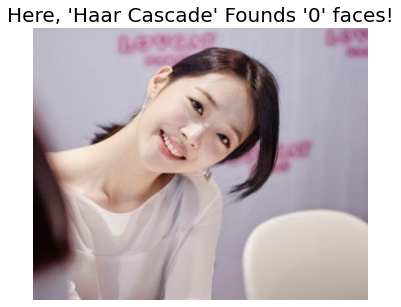

In [13]:
IMG_URL8 ='https://cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/2F5BCHRF2KSUXPQRXBPVG5OIDA.jpg'
find_faces(0, IMG_URL8,6,5)

Here, 'Haar Cascade' Founds '1' faces!


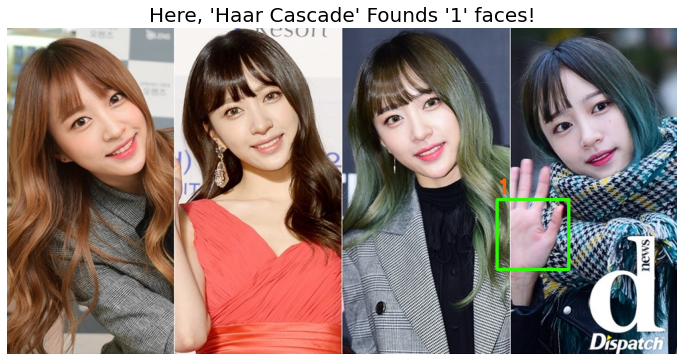

In [14]:
find_faces(1, 'hani_leaned_faces.jpg',12,6)